# Instruction

In this part of the assignment, you will carry out regression tasks to explain the vaccination rate in the counties in the US. We have already used the dataset in the class. 

The data file is available from the link below.  

In [1]:
!wget https://www.dropbox.com/s/zs20lk4n84ou8nh/df_vaccine_county.csv -O df_vaccine_county.csv

--2022-01-06 10:57:34--  https://www.dropbox.com/s/zs20lk4n84ou8nh/df_vaccine_county.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zs20lk4n84ou8nh/df_vaccine_county.csv [following]
--2022-01-06 10:57:34--  https://www.dropbox.com/s/raw/zs20lk4n84ou8nh/df_vaccine_county.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca497ecdbb7fd41f7da32ede4e.dl.dropboxusercontent.com/cd/0/inline/BdTpY3-Hcp7I3rE_R1eY_bdY3wRacD9ZtC41qGLrIQfrX-55YlhirFR_Ukkjx7474AwiEb6sc-_v73OuBuryi_ITQLOjMbx8rPDl9x_ItFhfDHhAAV_2H6zh4qmaxJzCSsRYLDpZX9Iq0gnqejLx5gWt/file# [following]
--2022-01-06 10:57:34--  https://ucca497ecdbb7fd41f7da32ede4e.dl.dropboxusercontent.com/cd/0/inline/BdTpY3-Hcp7I3rE_R1eY_bdY3wRacD9ZtC41qGLrIQfrX-55YlhirFR_Ukkjx74

The variable in the file are:

- fips: County FIPS code

- Series_Complete_pct_2021_**: Percentage of people who have finished two doses of vaccination
  
- pct_trump_2020: Trump vote percentage in 2020 presidential election

- TotalPop: Total Population

- Hispanic: % Hispanic

- White: % White

- Black: % black

- Income: Median household income

-  Unemployment: Unemployment rate

- County: County name

- st: State code

- state: State name

- Region: Region the county belongs

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit linear regression (17 percent)

In this dataset there are 10 variables for the county level vaccination in each month from February to November 2021. In this section, you will carry out the following tasks.

1. Run 10 linear regression models and record RMSE. Discuss the change in RMSE over time. 
2. Run 10 linear regression models and record coefficients. Discuss the results. How does the coefficient change over time? Which coefficient makes an interesting move?


Note: 
- You need to follow standard ML steps (e.g. train-test-split)
- You need to standardize the input variables for coefficient comparison

Hints:

- It is probably a good idea to construct a function to get the outcome metrics.
    - An example of a partial function definition is provided below. The example function returns a data frame with one row. It is up to you whether you use it or not.
- There are several possibilities to select the dependent variable for each month.
    1. Use the variable name as an argument of your function
    2. Reshape the data (e.g. `wide_to_long` etc)
- There are missing values for some columns. You need to drop rows with missing values
- My test run results for 2) looks like this (showing only Black and Income)

| month | Black      | Income     |
|-------|------------|------------|
| 2     | -0.5747041 | -0.0484797 |
| 3     | -2.3072432 | -0.3452062 |
| 4     | -4.3787139 | -1.0462465 |
| 5     | -5.1179071 | -1.0122352 |
| 6     | -5.5947789 | -0.3423194 |
| 7     | -6.0370055 | -0.0625332 |
| 8     | -6.2024639 | 0.01005049 |
| 9     | -6.2330683 | 0.05926672 |
| 10    | -5.5140213 | 0.56110545 |
| 11    | -3.5685842 | 1.32186301 |



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
df_vaccine_county = pd.read_csv("df_vaccine_county.csv")
df_vaccine_county.head()

,fips,Series_Complete_pct_2021_02,Series_Complete_pct_2021_03,Series_Complete_pct_2021_04,Series_Complete_pct_2021_05,Series_Complete_pct_2021_06,Series_Complete_pct_2021_07,Series_Complete_pct_2021_08,Series_Complete_pct_2021_09,Series_Complete_pct_2021_10,Series_Complete_pct_2021_11,pct_trump_2020,TotalPop,Hispanic,White,Black,Income,Unemployment,County,st,state,Region
0,17073,2.2,6.7,19.1,32.9,39.6,43.4,45.1,47.1,48.9,53.9,0.595331,49649.0,5.5,90.8,1.8,55755.0,5.1,Henry County,IL,Illinois,Midwest
1,22025,0.7,6.6,11.4,19.6,22.2,24.0,25.4,29.7,34.8,36.5,0.728901,10044.0,1.5,66.0,31.9,34470.0,5.6,Catahoula Parish,LA,Louisiana,South
2,41035,2.4,7.3,18.2,25.9,32.7,37.2,39.0,40.6,43.6,46.3,0.689103,66018.0,12.3,78.7,0.7,42531.0,9.1,Klamath County,OR,Oregon,West
3,37173,1.2,10.5,22.7,33.9,37.2,39.8,40.9,43.2,45.8,49.1,0.588710,14208.0,4.9,62.7,0.5,35271.0,7.4,Swain County,NC,North Carolina,South
4,26145,2.1,8.3,19.4,31.8,38.6,42.1,43.3,44.6,45.8,48.5,0.491393,193803.0,8.3,69.7,18.1,45034.0,8.2,Saginaw County,MI,Michigan,Midwest


TRAIN-TEST SPLIT

In [26]:
df_vaccine_county.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_vaccine_county = df_vaccine_county[~df_vaccine_county.isin([np.nan, np.inf, -np.inf]).any(1)]

In [27]:
X = df_vaccine_county.drop(['pct_trump_2020', 'County', 'st', 'state', 'Region'],  axis = 1)
Y = df_vaccine_county['pct_trump_2020']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

STANDARIZING DATA

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Estimating Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_lm = LinearRegression()

In [34]:
model_lm.fit(X_train_scaled, Y_train)

LinearRegression()

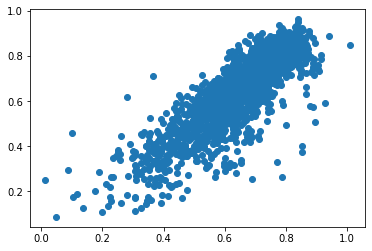

In [38]:
pred_train = model_lm.predict(X_train_scaled)
plt.plot(pred_train, Y_train, 'o')

#Model Evaluations

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
pred_test = model_lm.predict(X_train_scaled)
#Revisar
#RMSE = np.sqrt(mean_squared_error(Y_test, pred_test))

In [48]:
test_error = Y_test - pred_test

ValueError: ignored

Función a revisar 

In [10]:
def estimate_model(mth):
  ## do domething
  df_out = pd.DataFrame([model.coef_], columns= X.columns, index = [0])
  df_out['rmse'] = rmse
  return(df_out)

# LASSO regression (8 percent)

- Now repeat the previous steps with `LassoCV`. How the result look like? Which variables are consistently strong predictors? Which variables are getting relevant/irrelevant in predicting vaccination take-up rate?

In [11]:
from sklearn.linear_model import LassoCV